In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D

In [10]:
pitch_1 = '100x25x150'
pitch_2 = '100x25x100'
pitch_3 = '50x25x100'
pitch_4 = '50x20x100'
pitch_5 = '50x15x100'
pitch_6 = '50x12P5x100'
pitch_7 = '50x10x100'

df_1 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/{}_timeslices20_dataset2s_vars.parquet'.format(pitch_1))
df_2 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/{}_timeslices20_dataset2s_vars.parquet'.format(pitch_2))
df_3 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/{}_timeslices20_dataset2s_vars.parquet'.format(pitch_3))
df_4 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/{}_timeslices20_dataset2s_vars.parquet'.format(pitch_4))
df_5 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/{}_timeslices20_dataset2s_vars.parquet'.format(pitch_5))
df_6 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/{}_timeslices20_dataset2s_vars.parquet'.format(pitch_6))
df_7 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/{}_timeslices20_dataset2s_vars.parquet'.format(pitch_7))

In [11]:
df_1

,x,M11,y,M22,cotA,M33,cotB,M44,M21,M31,...,sigmacotA,sigmacotB,residualsX,residualsY,residualsA,residualsB,pullx,pully,pullcotA,pullcotB
0,0.900452,0.077454,-0.476196,0.036804,0.601074,0.025452,0.176880,0.031921,0.018188,0.005005,...,0.026340,0.035055,-0.002824,0.019156,-0.007724,0.023213,-0.036458,0.466611,-0.293230,0.662201
1,0.919800,0.067627,-0.008911,0.025696,0.631287,0.020935,-0.043396,0.027893,0.000854,0.005127,...,0.021927,0.029931,-0.000135,-0.012899,-0.013813,0.007554,-0.001999,-0.501700,-0.629944,0.252376
2,0.253967,0.045288,0.513855,0.042786,-0.361145,0.015503,0.224792,0.030762,-0.009827,0.000122,...,0.015578,0.033928,0.024198,-0.041230,-0.003898,-0.027443,0.534311,-0.939188,-0.250216,-0.808860
3,-0.615662,0.071045,-0.885986,0.078430,-0.179199,0.023743,-0.141541,0.049500,0.007812,0.003784,...,0.024095,0.049575,-0.089331,-0.096891,-0.018103,-0.001187,-1.257394,-1.229298,-0.751319,-0.023951
4,0.135193,0.060547,0.343628,0.036194,0.441895,0.020569,0.034180,0.026428,0.015259,0.000793,...,0.020607,0.028471,0.042042,-0.017016,0.013478,0.009310,0.694373,-0.433198,0.654062,0.326994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464734,0.233459,0.061584,-0.759277,0.022949,0.360107,0.022278,-0.052979,0.022461,0.002319,0.003174,...,0.022871,0.023957,-0.002285,0.001775,0.009732,0.020438,-0.037102,0.076955,0.425504,0.853097
464735,-0.407227,0.081177,0.490906,0.071350,-0.101257,0.022461,-0.087891,0.042297,-0.008301,-0.003906,...,0.022956,0.042706,-0.098515,0.010828,0.014205,0.002880,-1.213584,0.150736,0.618794,0.067433
464736,0.213257,0.060974,0.605652,0.053711,-0.243164,0.015625,-0.176880,0.036682,0.009399,-0.005920,...,0.016741,0.037064,0.025657,-0.045206,-0.011586,0.010004,0.420789,-0.829048,-0.692061,0.269910
464737,-0.348450,0.059143,0.033936,0.052063,0.203796,0.021240,0.015137,0.029480,0.012451,0.001831,...,0.021328,0.030876,0.026543,-0.005999,-0.016700,-0.041302,0.448798,-0.112074,-0.782994,-1.337676


# Scaling Lists for Different Pixel Pitches:
* 100x25x100 um:  [150.0, 37.5, 10.0, 1.22]
* 50x25x100 um:   [75.0, 37.5, 10.0, 1.22]
* 50x20x100 um:   [75.0, 30.0, 10.0, 1.22]
* 50x15x100 um:   [75.0, 22.5, 10.0, 1.22]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 1.22]
* 50x10x100 um:   [75.0, 15.0, 10.0, 1.22]

### $x$ Residuals

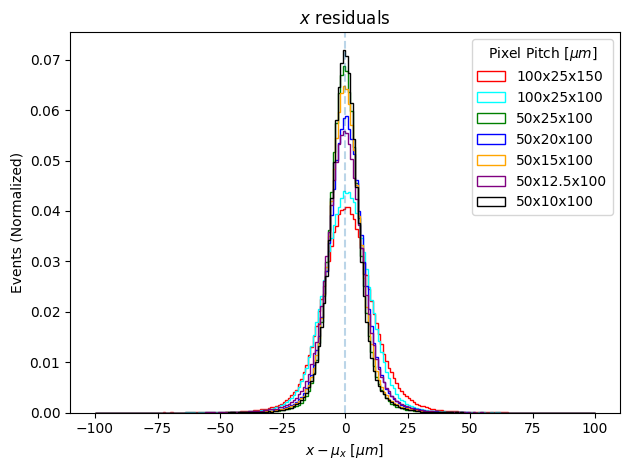

In [72]:
fig, ax = plt.subplots()
bins = np.linspace(-100,100,201)

ax.hist(df_1['residualsX']*150.0, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist(df_2['residualsX']*150.0, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist(df_3['residualsX']*75.0, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist(df_4['residualsX']*75.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist(df_5['residualsX']*75.0, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist(df_6['residualsX']*75.0, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist(df_7['residualsX']*75.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title('$x$ residuals')
ax.set_xlabel('$x - \mu_{x}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.show()

### $y$ Residuals

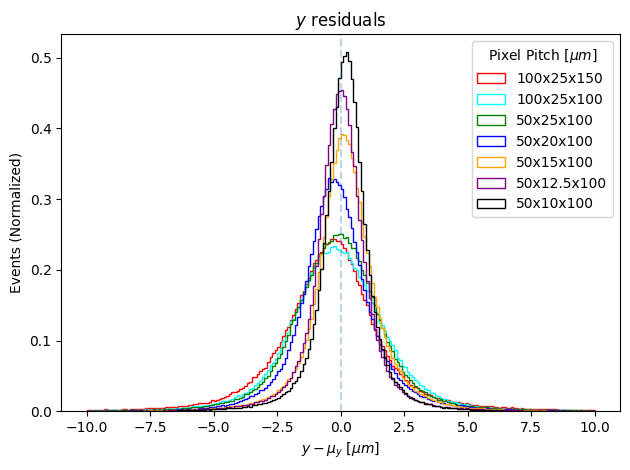

In [73]:
fig, ax = plt.subplots()
bins = np.linspace(-10,10,201)

ax.hist(df_1['residualsY']*37.5, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist(df_2['residualsY']*37.5, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist(df_3['residualsY']*37.5, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist(df_4['residualsY']*30.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist(df_5['residualsY']*22.5, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist(df_6['residualsY']*18.75, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist(df_7['residualsY']*15.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title('$y$ residuals')
ax.set_xlabel('$y - \mu_{y}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.show()

### cot$\alpha$ Residuals

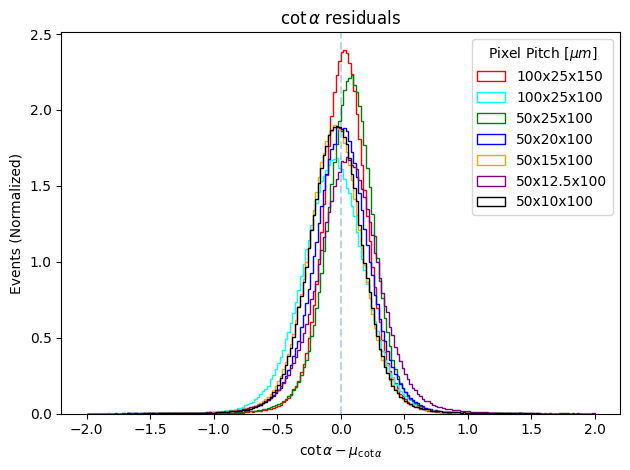

In [96]:
fig, ax = plt.subplots()
bins = np.linspace(-2,2,201)

ax.hist(df_1['residualsA']*10.0, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist(df_2['residualsA']*10.0, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist(df_3['residualsA']*10.0, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist(df_4['residualsA']*10.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist(df_5['residualsA']*10.0, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist(df_6['residualsA']*10.0, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist(df_7['residualsA']*10.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title(r'$\cot \alpha$ residuals')
ax.set_xlabel(r'$\cot \alpha - \mu_{\cot \alpha}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.show()

### cot$\beta$ Residuals

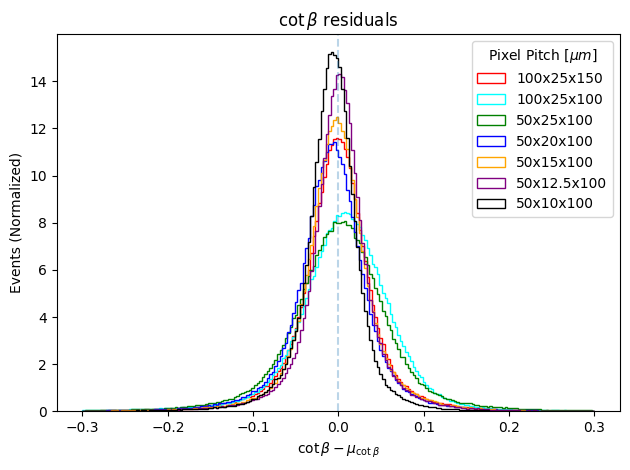

In [95]:
fig, ax = plt.subplots()
bins = np.linspace(-0.3,0.3,201)

ax.hist(df_1['residualsB']*1.22, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist(df_2['residualsB']*1.22, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist(df_3['residualsB']*1.22, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist(df_4['residualsB']*1.22, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist(df_5['residualsB']*1.22, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist(df_6['residualsB']*1.22, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist(df_7['residualsB']*1.22, bins=bins, histtype='step', color='black', label='50x10x100', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title(r'$\cot \beta$ residuals')
ax.set_xlabel(r'$\cot \beta - \mu_{\cot \beta}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.show()

### $x$ uncertainties

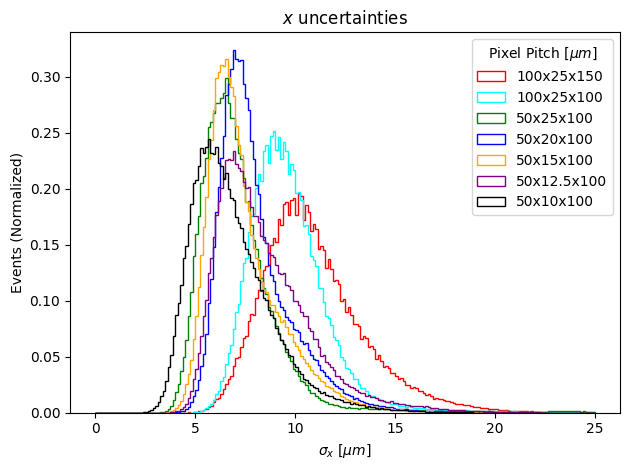

In [85]:
fig, ax = plt.subplots()
bins = np.linspace(0,25,201)

ax.hist(df_1['sigmax']*150.0, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist(df_2['sigmax']*150.0, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist(df_3['sigmax']*75.0, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist(df_4['sigmax']*75.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist(df_5['sigmax']*75.0, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist(df_6['sigmax']*75.0, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist(df_7['sigmax']*75.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title('$x$ uncertainties')
ax.set_xlabel('$\sigma_{x}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.show()

### $y$ uncertainties

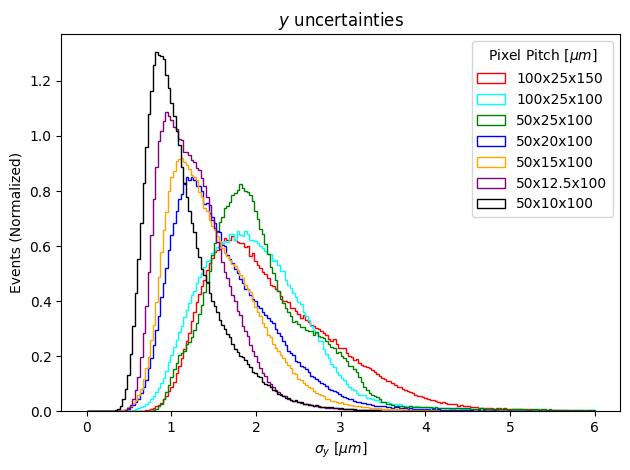

In [87]:
fig, ax = plt.subplots()
bins = np.linspace(0,6,201)

ax.hist(df_1['sigmay']*37.5, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist(df_2['sigmay']*37.5, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist(df_3['sigmay']*37.5, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist(df_4['sigmay']*30.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist(df_5['sigmay']*22.5, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist(df_6['sigmay']*18.75, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist(df_7['sigmay']*15.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title('$y$ uncertainties')
ax.set_xlabel('$\sigma_{y}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.show()

### cot$\alpha$ uncertainties

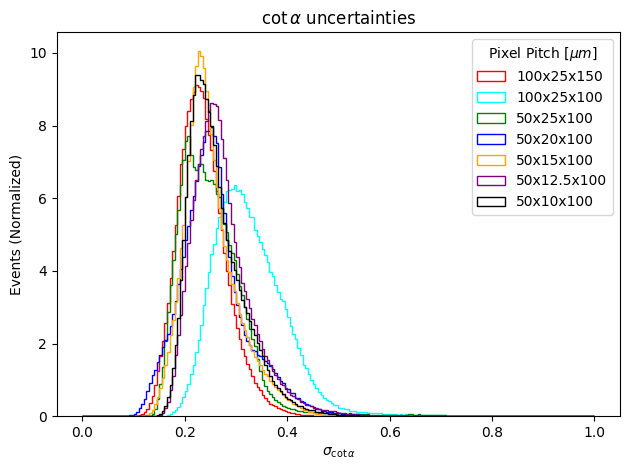

In [146]:
fig, ax = plt.subplots()
bins = np.linspace(0,1,201)

ax.hist(df_1['sigmacotA']*10.0, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist(df_2['sigmacotA']*10.0, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist(df_3['sigmacotA']*10.0, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist(df_4['sigmacotA']*10.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist(df_5['sigmacotA']*10.0, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist(df_6['sigmacotA']*10.0, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist(df_7['sigmacotA']*10.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title(r'$\cot\alpha$ uncertainties')
ax.set_xlabel(r'$\sigma_{\cot\alpha}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.show()

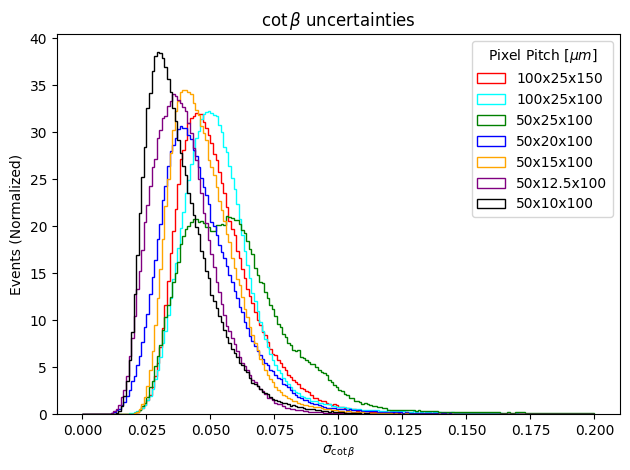

In [98]:
fig, ax = plt.subplots()
bins = np.linspace(0,0.2,201)

ax.hist(df_1['sigmacotB']*1.22, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist(df_2['sigmacotB']*1.22, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist(df_3['sigmacotB']*1.22, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist(df_4['sigmacotB']*1.22, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist(df_5['sigmacotB']*1.22, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist(df_6['sigmacotB']*1.22, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist(df_7['sigmacotB']*1.22, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title(r'$\cot \beta$ uncertainties')
ax.set_xlabel(r'$\sigma_{\cot \beta}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.show()

### Residuals + Uncertainties Comparison

In [218]:
def residual_plot(ax, thisdf, var1, var2, label, name, color, scaling=1.0, alpha=0.25):
    
    nbins = 15
    
    var1_scaled = thisdf[var1] * scaling
    var2_scaled = thisdf[var2] * scaling
    residual_scaled = var1_scaled - var2_scaled
    
    xmin = np.min(var1_scaled)
    xmax = np.max(var1_scaled)
    
    step = 1.0*(xmax-xmin)/nbins
    
    x = sns.regplot(x=var1_scaled, y=residual_scaled, x_bins=np.linspace(xmin,xmax,nbins), fit_reg=None, marker='.', ax=ax, color=color, label=label)
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('True - predicted ' + name)
    
    thisdf['residual'+var2] = residual_scaled
    print(var1)
    
    means = []
    upbar = []
    downbar = []
    for i in range(0,nbins):
        means += [np.mean(thisdf['residual'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)])]
        upbar += [means[i] + np.mean(thisdf['sigma'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)] * scaling)]
        downbar += [means[i] - np.mean(thisdf['sigma'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)] * scaling)]
    ax.fill_between(x=np.linspace(xmin,xmax,nbins),y1=upbar,y2=downbar, alpha=alpha, color=color)

pi = 3.14159265359

def inverse_cot(cota):
    a = np.arctan(1.0/cota)
    a[np.where(a<0)] = a[np.where(a<0)] + pi
    return a    

def residual_plot_deg(ax, thisdf, var1, var2, label, name, color, scaling=1.0, alpha=0.25):
    # positions
    if 'cot' not in var1:
        residual_plot(ax, thisdf, var1, var2, name, scaling=scaling)
        return

    thisdf['angle'] = inverse_cot(thisdf[var2].values * scaling)*180/pi
    
    thisdf['angleup'] = abs(inverse_cot((thisdf[var2].values + thisdf['sigma'+var2].values) * scaling)*180/pi - thisdf['angle'])
    thisdf['angledown'] = abs(inverse_cot((thisdf[var2].values - thisdf['sigma'+var2].values) * scaling)*180/pi - thisdf['angle'])
    thisdf['angletrue'] = inverse_cot(thisdf[var1].values * scaling)*180/pi
        
    var1 = 'angletrue'
    var2 = 'angle'
    
    nbins = 15
    xmin = np.min(thisdf[var1])
    xmax = np.max(thisdf[var1])
    
    step = 1.0*(xmax-xmin)/nbins
        
    x = sns.regplot(x=thisdf[var1], y=(thisdf[var1]-thisdf[var2]), x_bins=np.linspace(xmin,xmax,nbins), fit_reg=None, marker='.', ax=ax, color=color, label=label)
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('True - predicted ' + name)
    
    thisdf['residual'+var2] = (thisdf[var1]-thisdf[var2])
    print(var1)
    
    means = []    
    upbar = []
    downbar = []
    for i in range(0,nbins):
        means += [np.mean(thisdf['residual'+var2][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
        upbar += [means[i] + np.mean(thisdf['angleup'][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
        downbar += [means[i] - np.mean(thisdf['angledown'][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
    #ax.scatter(x=np.linspace(xmin,xmax,nbins),y=means)
    ax.fill_between(x=np.linspace(xmin,xmax,nbins),y1=upbar,y2=downbar, alpha=alpha, color=color)

### $x$ residuals + $\sigma_x$

xtrue
xtrue
xtrue
xtrue
xtrue
xtrue
xtrue
xtrue
xtrue


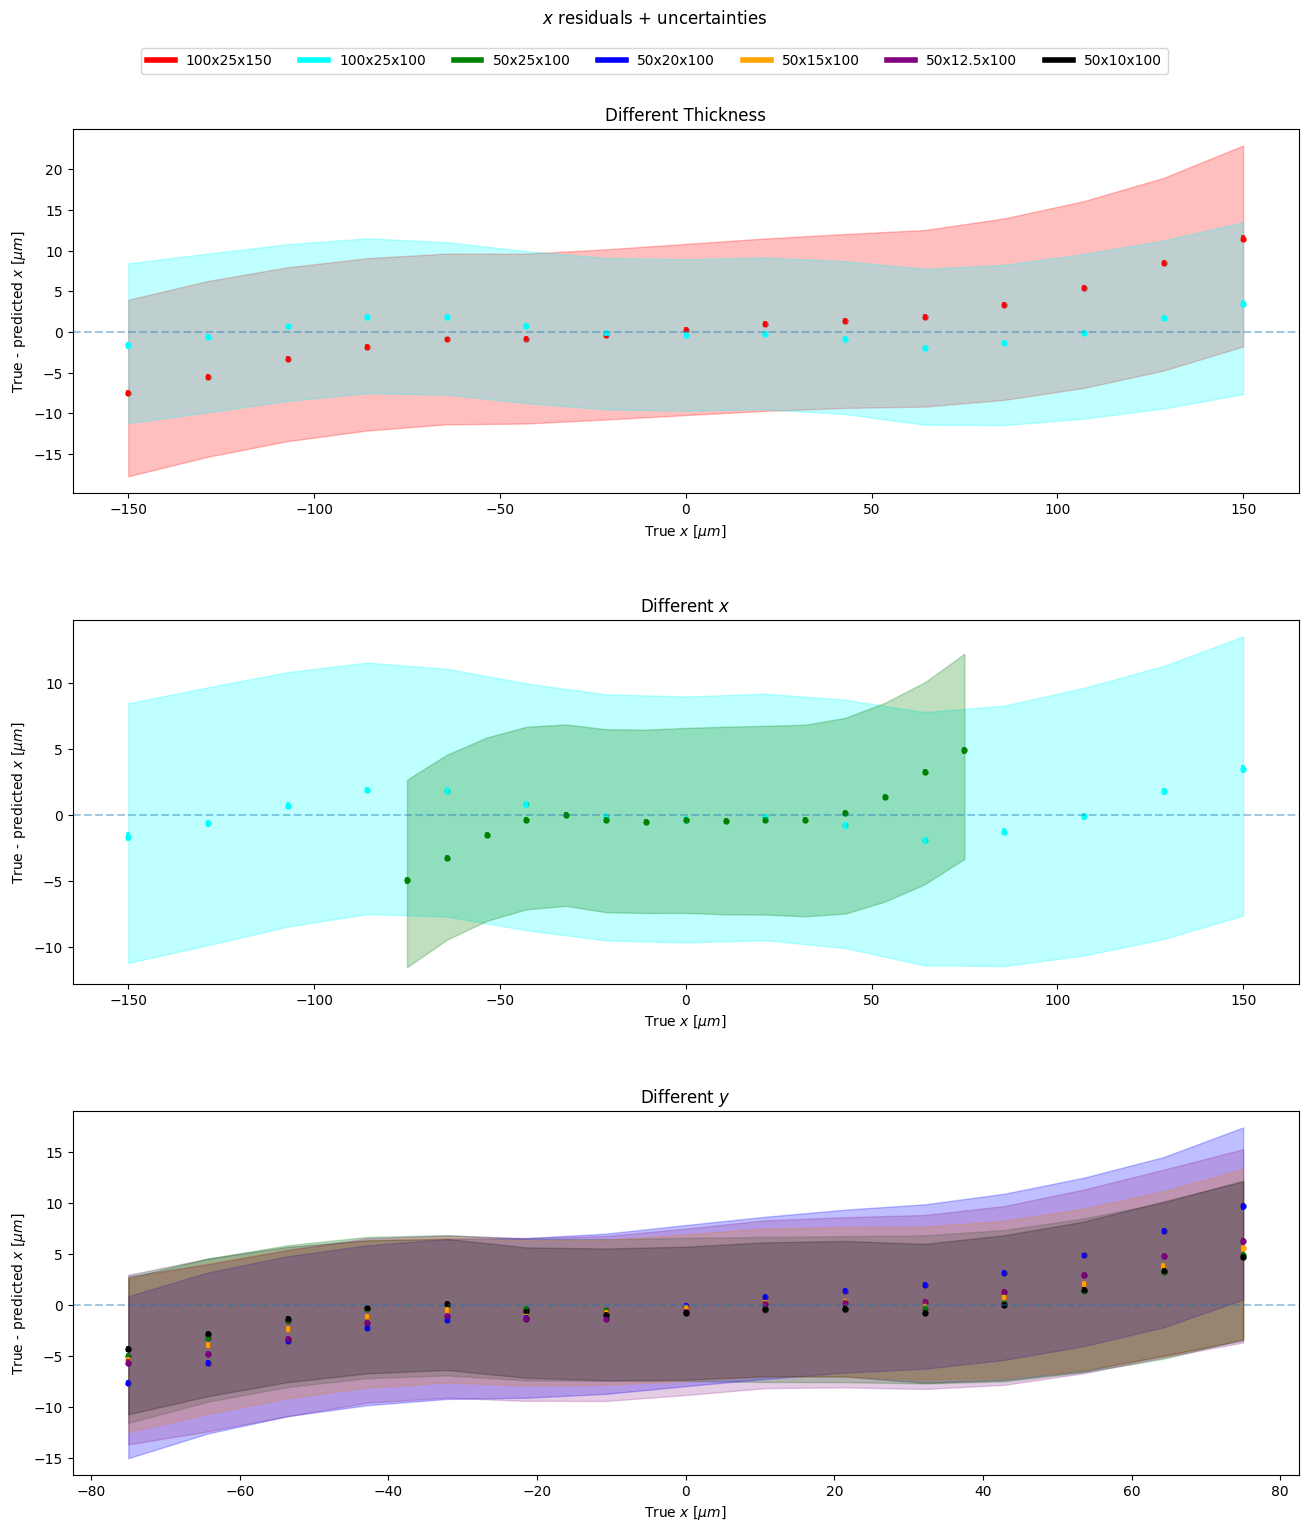

In [227]:
fig, ax = plt.subplots(3, figsize=(14,16))

residual_plot(ax[0], df_1, 'xtrue', 'x', label='100x25x150', name=r'$x$ $[\mu m]$', color='red', scaling=150.0)
residual_plot(ax[0], df_2, 'xtrue', 'x', label='100x25x100', name=r'$x$ $[\mu m]$', color='cyan', scaling=150.0)
ax[0].axhline(alpha=0.4, ls='dashed')
ax[0].set_title('Different Thickness')

residual_plot(ax[1], df_2, 'xtrue', 'x', label='100x25x100', name=r'$x$ $[\mu m]$', color='cyan', scaling=150.0)
residual_plot(ax[1], df_3, 'xtrue', 'x', label='50x25x100', name=r'$x$ $[\mu m]$', color='green', scaling=75.0)
ax[1].axhline(alpha=0.4, ls='dashed')
ax[1].set_title('Different $x$')

residual_plot(ax[2], df_3, 'xtrue', 'x', label='50x25x100', name=r'$x$ $[\mu m]$', color='green', scaling=75.0)
residual_plot(ax[2], df_4, 'xtrue', 'x', label='50x20x100', name=r'$x$ $[\mu m]$', color='blue', scaling=75.0)
residual_plot(ax[2], df_5, 'xtrue', 'x', label='50x15x100', name=r'$x$ $[\mu m]$', color='orange', scaling=75.0)
residual_plot(ax[2], df_6, 'xtrue', 'x', label='50x12.5x100', name=r'$x$ $[\mu m]$', color='purple', alpha=0.2, scaling=75.0)
residual_plot(ax[2], df_7, 'xtrue', 'x', label='50x10x100', name=r'$x$ $[\mu m]$', color='black', alpha=0.2, scaling=75.0)
ax[2].axhline(alpha=0.4, ls='dashed')
ax[2].set_title('Different $y$')


labels = ['100x25x150', '100x25x100', '50x25x100', '50x20x100', '50x15x100', '50x12.5x100', '50x10x100']
colors = ['red', 'cyan', 'green', 'blue', 'orange', 'purple', 'black']

# Create custom legend items
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for label, color in zip(labels, colors)]

fig.legend(handles=legend_elements, ncol=7, loc='upper center', bbox_to_anchor=(0.5, 0.96))
fig.suptitle('$x$ residuals + uncertainties')
fig.tight_layout(pad=4.0)

fig.savefig('/home/dajiang/smart-pixels-ml/plots/x_res_sigma.png', dpi=300)

### $y$ residuals + $\sigma_y$

ytrue
ytrue
ytrue
ytrue
ytrue
ytrue
ytrue
ytrue
ytrue


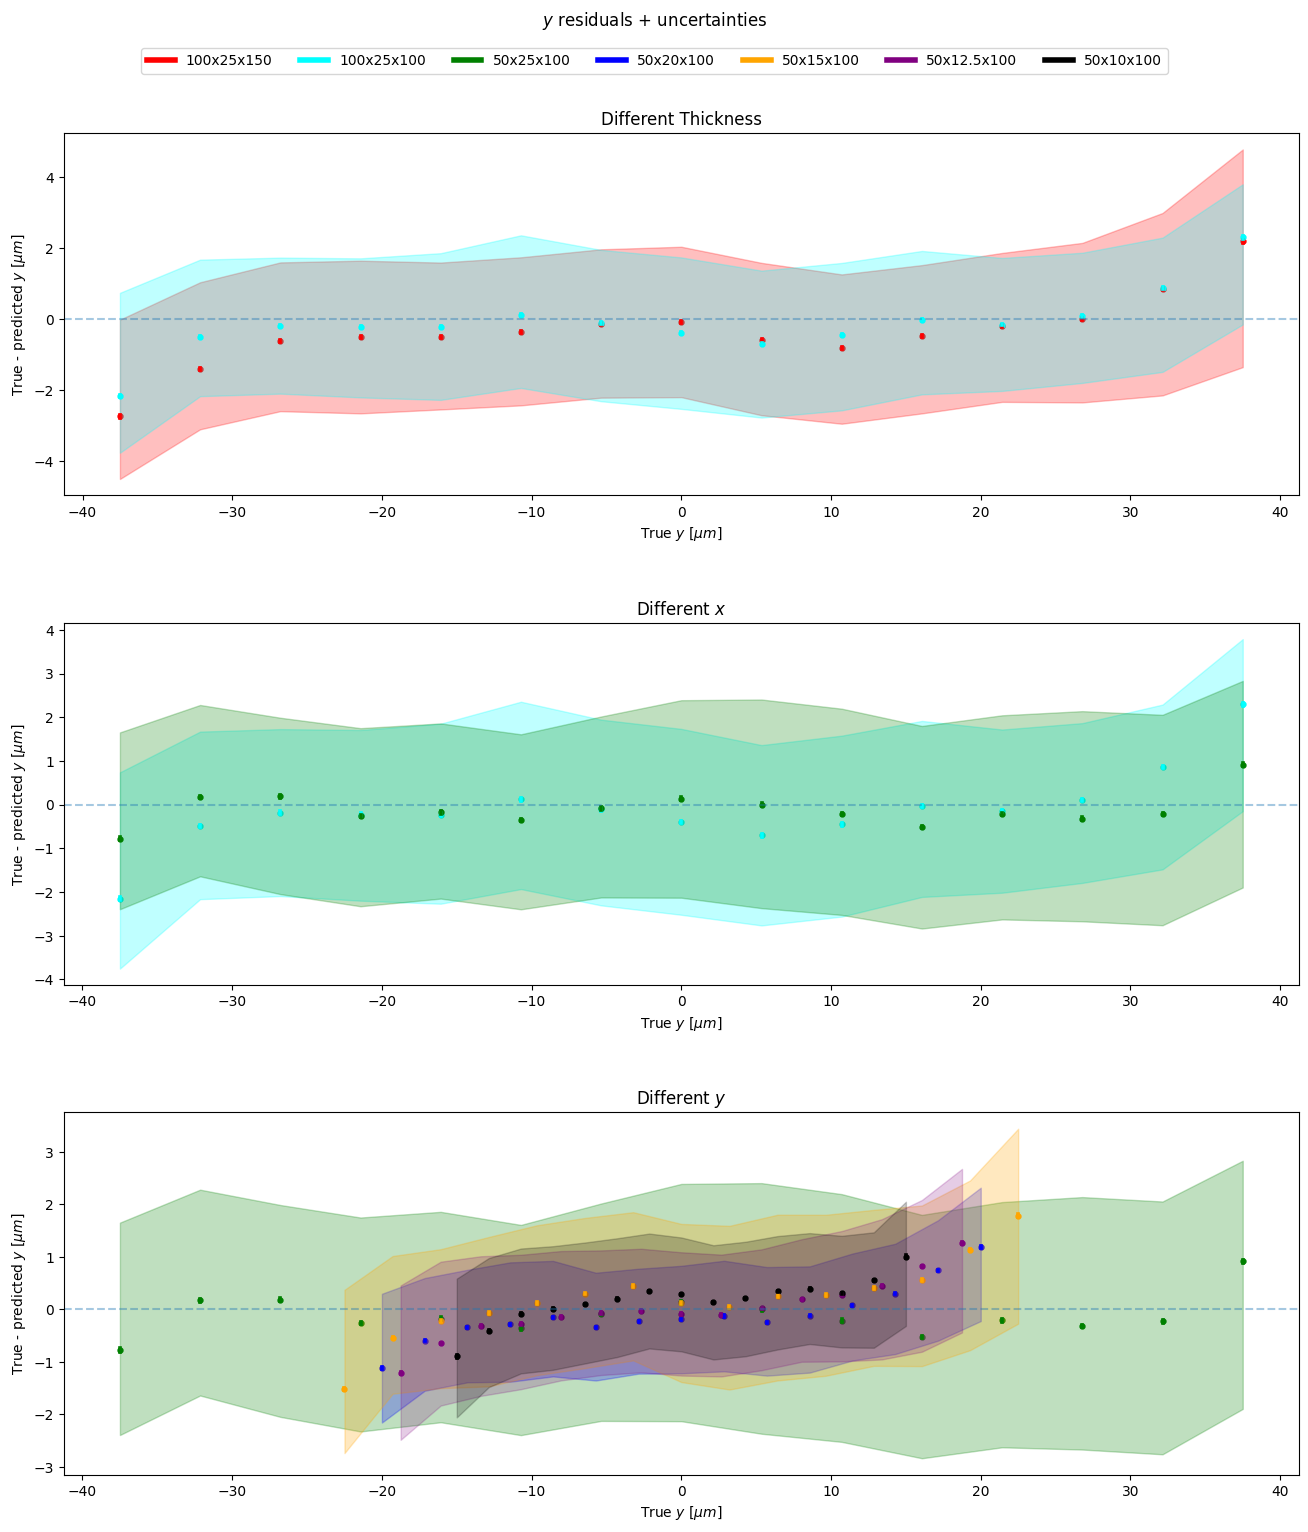

In [228]:
fig, ax = plt.subplots(3, figsize=(14,16))

residual_plot(ax[0], df_1, 'ytrue', 'y', label='100x25x150', name=r'$y$ $[\mu m]$', color='red', scaling=37.5)
residual_plot(ax[0], df_2, 'ytrue', 'y', label='100x25x100', name=r'$y$ $[\mu m]$', color='cyan', scaling=37.5)
ax[0].axhline(alpha=0.4, ls='dashed')
ax[0].set_title('Different Thickness')

residual_plot(ax[1], df_2, 'ytrue', 'y', label='100x25x100', name=r'$y$ $[\mu m]$', color='cyan', scaling=37.5)
residual_plot(ax[1], df_3, 'ytrue', 'y', label='50x25x100', name=r'$y$ $[\mu m]$', color='green', scaling=37.5)
ax[1].axhline(alpha=0.4, ls='dashed')
ax[1].set_title('Different $x$')

residual_plot(ax[2], df_3, 'ytrue', 'y', label='50x25x100', name=r'$y$ $[\mu m]$', color='green', scaling=37.5)
residual_plot(ax[2], df_4, 'ytrue', 'y', label='50x20x100', name=r'$y$ $[\mu m]$', color='blue', scaling=20.0)
residual_plot(ax[2], df_5, 'ytrue', 'y', label='50x15x100', name=r'$y$ $[\mu m]$', color='orange', scaling=22.5)
residual_plot(ax[2], df_6, 'ytrue', 'y', label='50x12.5x100', name=r'$y$ $[\mu m]$', color='purple', alpha=0.2, scaling=18.75)
residual_plot(ax[2], df_7, 'ytrue', 'y', label='50x10x100', name=r'$y$ $[\mu m]$', color='black', alpha=0.2, scaling=15.0)
ax[2].axhline(alpha=0.4, ls='dashed')
ax[2].set_title('Different $y$')


labels = ['100x25x150', '100x25x100', '50x25x100', '50x20x100', '50x15x100', '50x12.5x100', '50x10x100']
colors = ['red', 'cyan', 'green', 'blue', 'orange', 'purple', 'black']

# Create custom legend items
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for label, color in zip(labels, colors)]

fig.legend(handles=legend_elements, ncol=7, loc='upper center', bbox_to_anchor=(0.5, 0.96))
fig.suptitle('$y$ residuals + uncertainties')
fig.tight_layout(pad=4.0)

fig.savefig('/home/dajiang/smart-pixels-ml/plots/y_res_sigma.png', dpi=300)

### $\alpha$ residuals + $\sigma_{\alpha}$

/tmp/ipykernel_395/291846152.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue


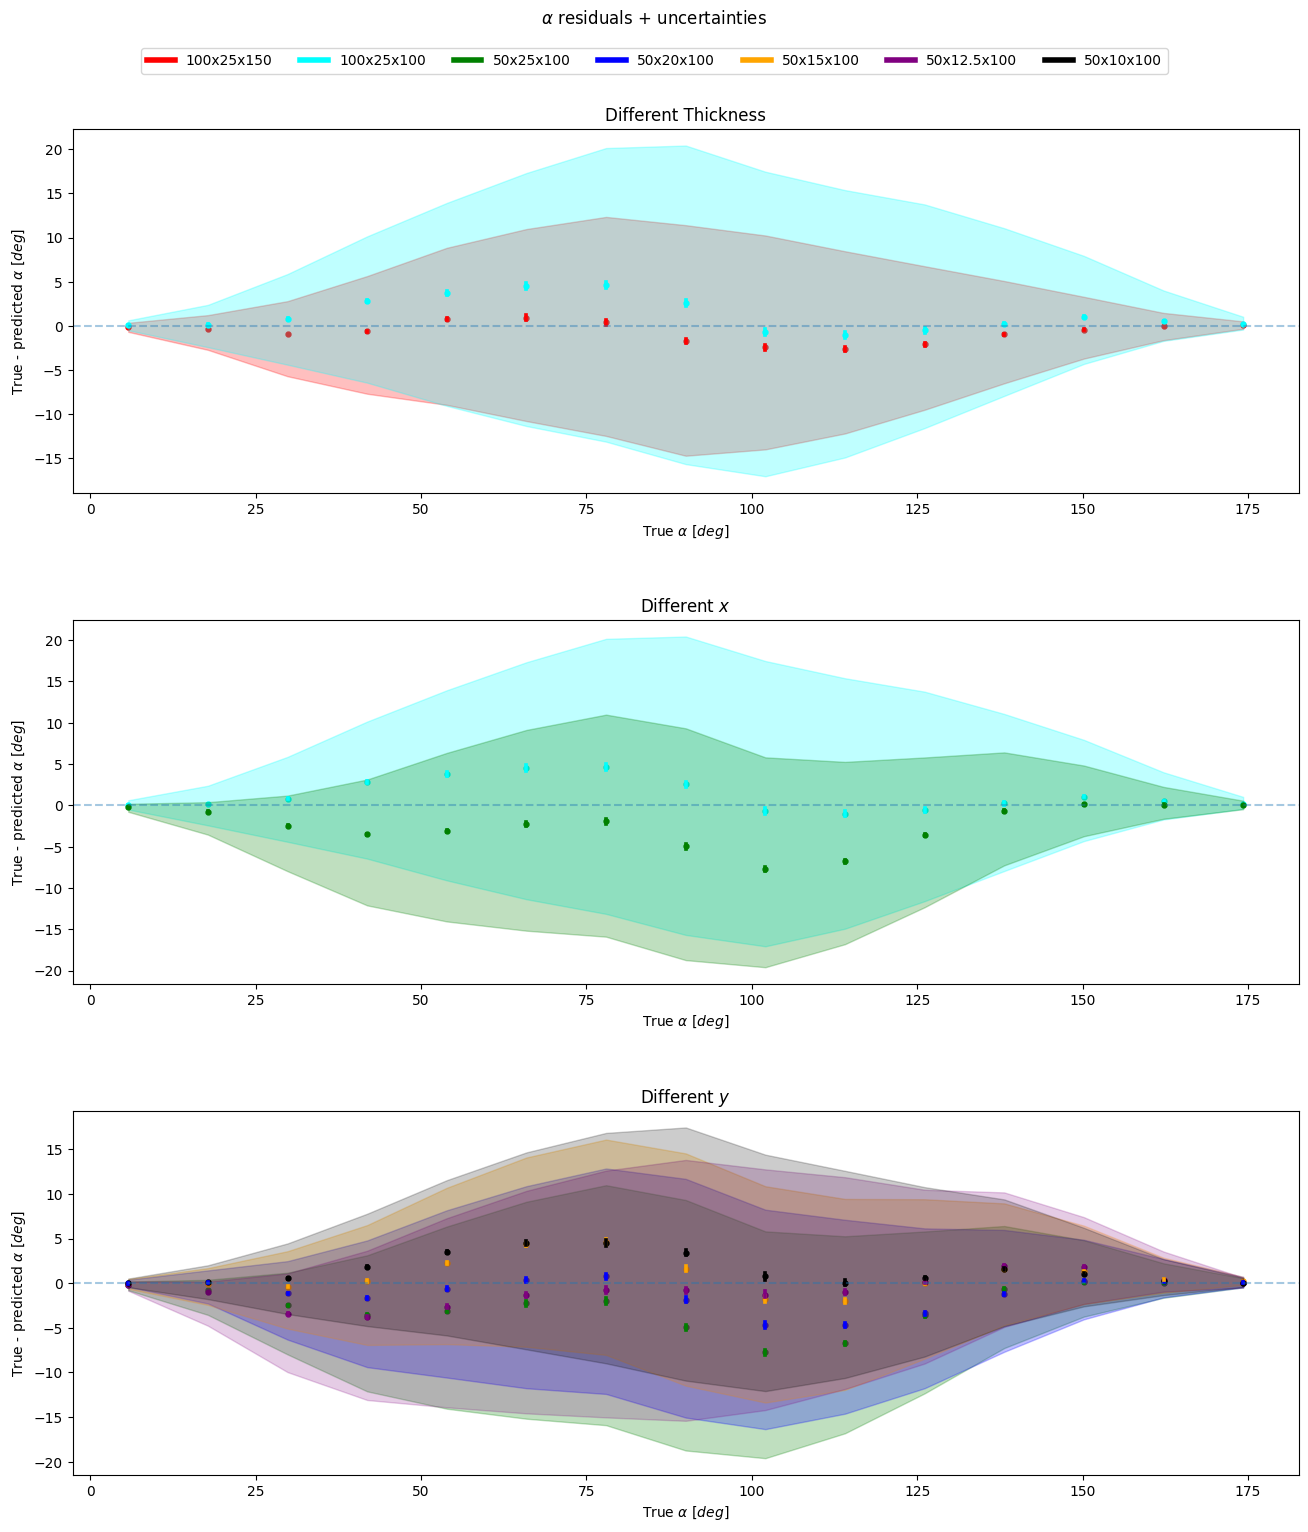

In [234]:
fig, ax = plt.subplots(3, figsize=(14,16))

residual_plot_deg(ax[0], df_1, 'cotAtrue', 'cotA', label='100x25x150', name=r'$\alpha$ $[deg]$', color='red', scaling=10.0)
residual_plot_deg(ax[0], df_2, 'cotAtrue', 'cotA', label='100x25x100', name=r'$\alpha$ $[deg]$', color='cyan', scaling=10.0)
ax[0].axhline(alpha=0.4, ls='dashed')
ax[0].set_title('Different Thickness')

residual_plot_deg(ax[1], df_2, 'cotAtrue', 'cotA', label='100x25x100', name=r'$\alpha$ $[deg]$', color='cyan', scaling=10.0)
residual_plot_deg(ax[1], df_3, 'cotAtrue', 'cotA', label='50x25x100', name=r'$\alpha$ $[deg]$', color='green', scaling=10.0)
ax[1].axhline(alpha=0.4, ls='dashed')
ax[1].set_title('Different $x$')

residual_plot_deg(ax[2], df_3, 'cotAtrue', 'cotA', label='50x25x100', name=r'$\alpha$ $[deg]$', color='green', scaling=10.0)
residual_plot_deg(ax[2], df_4, 'cotAtrue', 'cotA', label='50x20x100', name=r'$\alpha$ $[deg]$', color='blue', scaling=10.0)
residual_plot_deg(ax[2], df_5, 'cotAtrue', 'cotA', label='50x15x100', name=r'$\alpha$ $[deg]$', color='orange', scaling=10.0)
residual_plot_deg(ax[2], df_6, 'cotAtrue', 'cotA', label='50x12.5x100', name=r'$\alpha$ $[deg]$', color='purple', alpha=0.2, scaling=10.0)
residual_plot_deg(ax[2], df_7, 'cotAtrue', 'cotA', label='50x10x100', name=r'$\alpha$ $[deg]$', color='black', alpha=0.2, scaling=10.0)
ax[2].axhline(alpha=0.4, ls='dashed')
ax[2].set_title('Different $y$')


labels = ['100x25x150', '100x25x100', '50x25x100', '50x20x100', '50x15x100', '50x12.5x100', '50x10x100']
colors = ['red', 'cyan', 'green', 'blue', 'orange', 'purple', 'black']

# Create custom legend items
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for label, color in zip(labels, colors)]

fig.legend(handles=legend_elements, ncol=7, loc='upper center', bbox_to_anchor=(0.5, 0.96))
fig.suptitle(r'$\alpha$ residuals + uncertainties')
fig.tight_layout(pad=4.0)

fig.savefig('/home/dajiang/smart-pixels-ml/plots/alpha_res_sigma.png', dpi=300)

/tmp/ipykernel_395/291846152.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue


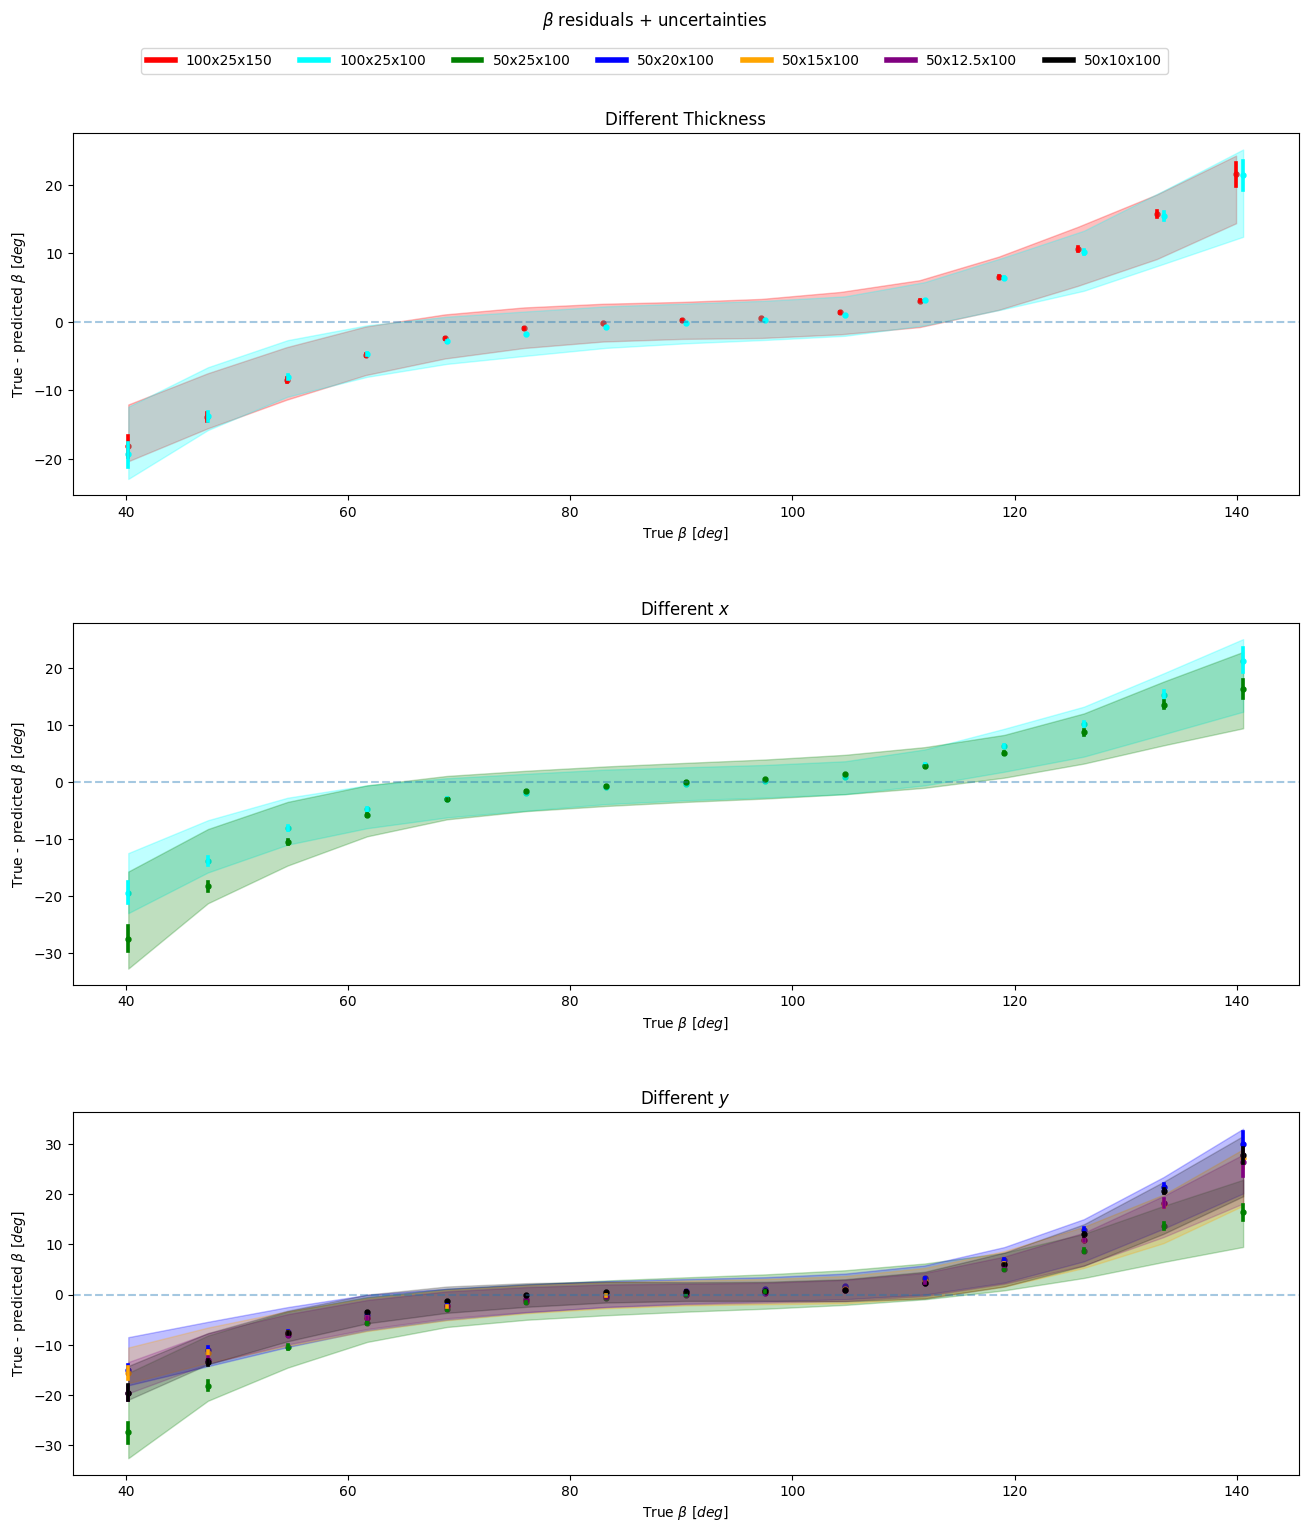

In [233]:
fig, ax = plt.subplots(3, figsize=(14,16))

residual_plot_deg(ax[0], df_1, 'cotBtrue', 'cotB', label='100x25x150', name=r'$\beta$ $[deg]$', color='red', scaling=1.22)
residual_plot_deg(ax[0], df_2, 'cotBtrue', 'cotB', label='100x25x100', name=r'$\beta$ $[deg]$', color='cyan', scaling=1.22)
ax[0].axhline(alpha=0.4, ls='dashed')
ax[0].set_title('Different Thickness')

residual_plot_deg(ax[1], df_2, 'cotBtrue', 'cotB', label='100x25x100', name=r'$\beta$ $[deg]$', color='cyan', scaling=1.22)
residual_plot_deg(ax[1], df_3, 'cotBtrue', 'cotB', label='50x25x100', name=r'$\beta$ $[deg]$', color='green', scaling=1.22)
ax[1].axhline(alpha=0.4, ls='dashed')
ax[1].set_title('Different $x$')

residual_plot_deg(ax[2], df_3, 'cotBtrue', 'cotB', label='50x25x100', name=r'$\beta$ $[deg]$', color='green', scaling=1.22)
residual_plot_deg(ax[2], df_4, 'cotBtrue', 'cotB', label='50x20x100', name=r'$\beta$ $[deg]$', color='blue', scaling=1.22)
residual_plot_deg(ax[2], df_5, 'cotBtrue', 'cotB', label='50x15x100', name=r'$\beta$ $[deg]$', color='orange', scaling=1.22)
residual_plot_deg(ax[2], df_6, 'cotBtrue', 'cotB', label='50x12.5x100', name=r'$\beta$ $[deg]$', color='purple', alpha=0.2, scaling=1.22)
residual_plot_deg(ax[2], df_7, 'cotBtrue', 'cotB', label='50x10x100', name=r'$\beta$ $[deg]$', color='black', alpha=0.2, scaling=1.22)
ax[2].axhline(alpha=0.4, ls='dashed')
ax[2].set_title('Different $y$')


labels = ['100x25x150', '100x25x100', '50x25x100', '50x20x100', '50x15x100', '50x12.5x100', '50x10x100']
colors = ['red', 'cyan', 'green', 'blue', 'orange', 'purple', 'black']

# Create custom legend items
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for label, color in zip(labels, colors)]

fig.legend(handles=legend_elements, ncol=7, loc='upper center', bbox_to_anchor=(0.5, 0.96))
fig.suptitle(r'$\beta$ residuals + uncertainties')
fig.tight_layout(pad=4.0)

fig.savefig('/home/dajiang/smart-pixels-ml/plots/beta_res_sigma.png', dpi=300)

### Pulls

In [126]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def pull_plot(ax, data, label, name, color):
    
    h = ax.hist(data, bins=np.linspace(-5,5,50), histtype='step', label=label, color=color)
    ax.legend(loc='upper right')
    ax.set_xlabel(name)
    ax.set_yscale('log')
    ax.axvline(alpha=0.3, ls='dashed')

    ydata = h[0]
    xdata = h[1][:-1]+5/49

    pars, cov = curve_fit(gauss,xdata,ydata,maxfev=5000)

    xbins = np.linspace(-5,5,100)
    ax.plot(xbins,gauss(xbins,pars[0],pars[1],pars[2]),color='black')
    ax.set_ylim(0.5,100000)

    #print('Mean',pars[1])
    #print('Sigma',pars[2])
    
    ax.text(-5,2000,"$\mu$="+str(round(pars[1],2)))
    ax.text(-5,1000,"$\sigma$="+str(round(abs(pars[2]),2)))

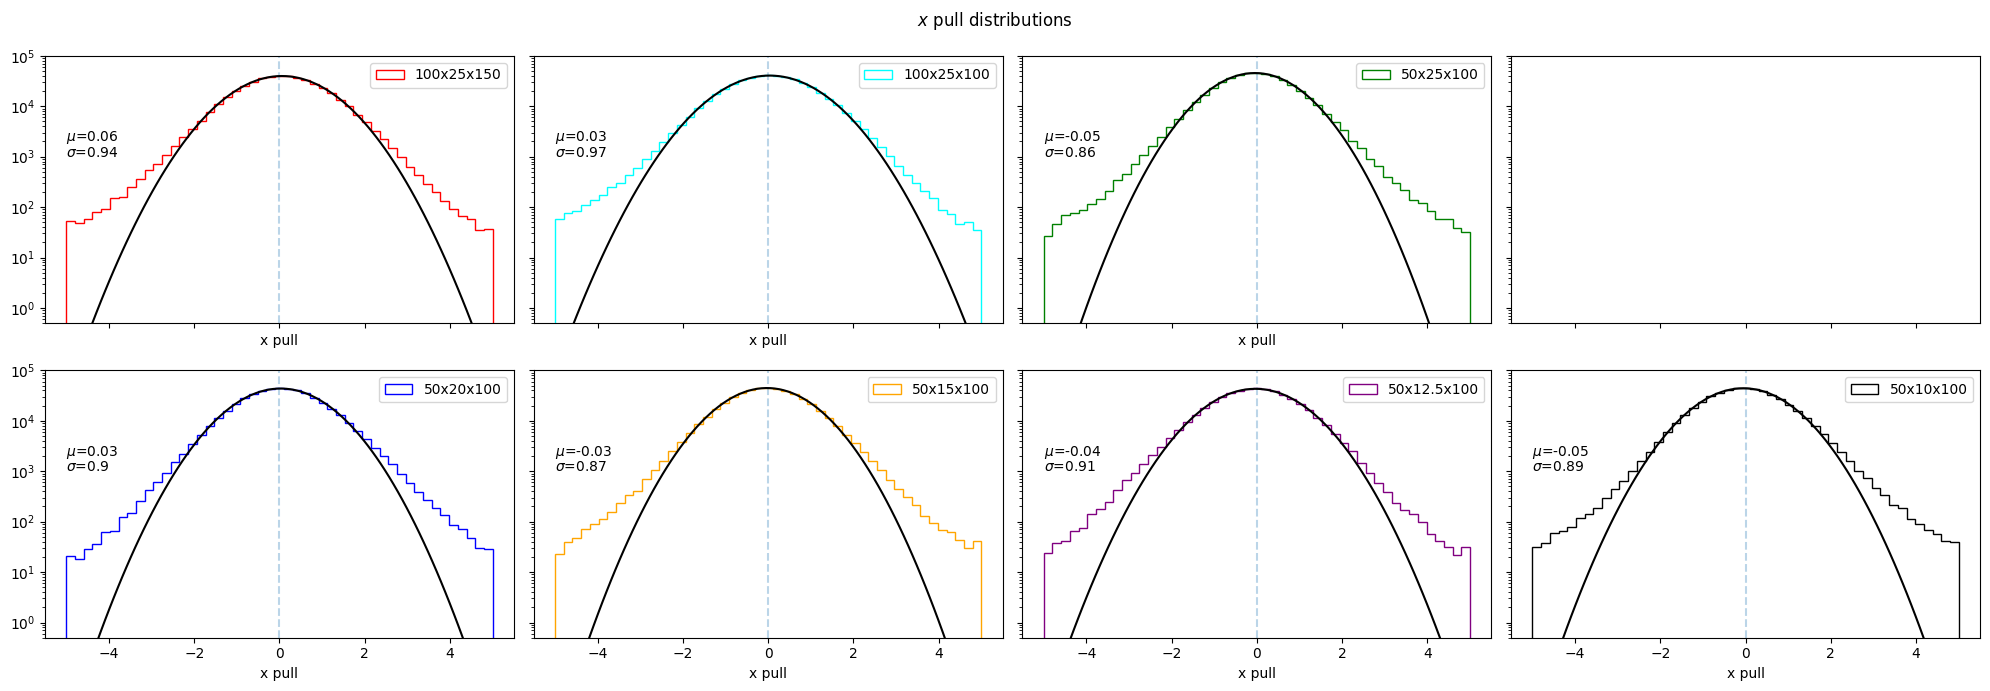

In [134]:
fig, axes = plt.subplots(2,4,sharex=True,sharey=True,figsize=(20,7))
pull_plot(axes[0][0], df_1['pullx'], label='100x25x150', name='x pull', color='red')
pull_plot(axes[0][1], df_2['pullx'], label='100x25x100', name='x pull', color='cyan')
pull_plot(axes[0][2], df_3['pullx'], label='50x25x100', name='x pull', color='green')
pull_plot(axes[1][0], df_4['pullx'], label='50x20x100', name='x pull', color='blue')
pull_plot(axes[1][1], df_5['pullx'], label='50x15x100', name='x pull', color='orange')
pull_plot(axes[1][2], df_6['pullx'], label='50x12.5x100', name='x pull', color='purple')
pull_plot(axes[1][3], df_7['pullx'], label='50x10x100', name='x pull', color='black')

fig.suptitle('$x$ pull distributions')
fig.tight_layout()
fig.show()

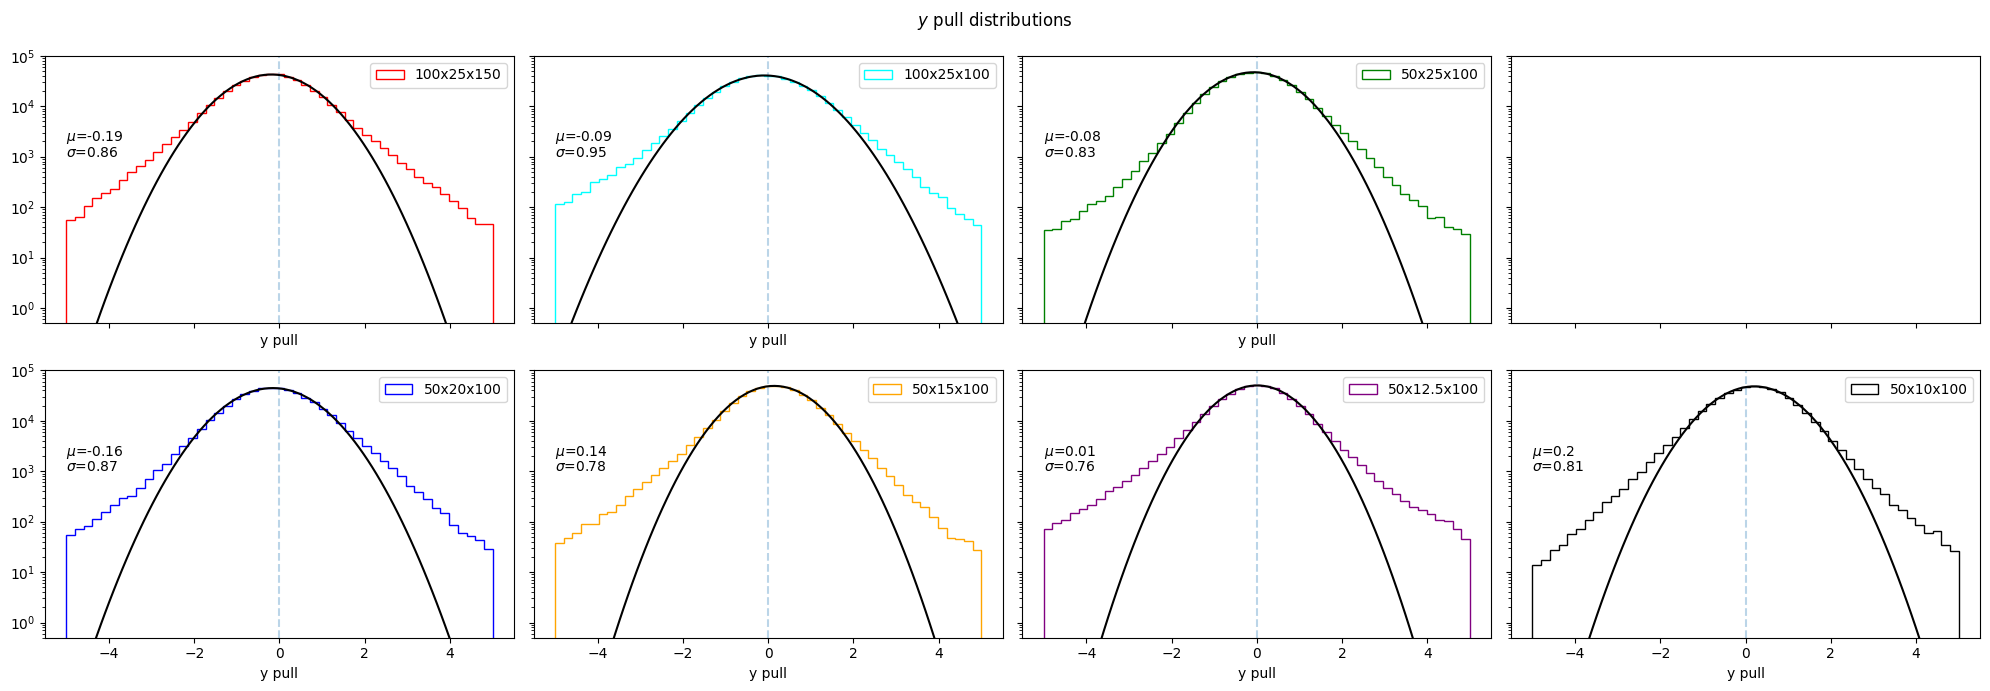

In [135]:
fig, axes = plt.subplots(2,4,sharex=True,sharey=True,figsize=(20,7))
pull_plot(axes[0][0], df_1['pully'], label='100x25x150', name='y pull', color='red')
pull_plot(axes[0][1], df_2['pully'], label='100x25x100', name='y pull', color='cyan')
pull_plot(axes[0][2], df_3['pully'], label='50x25x100', name='y pull', color='green')
pull_plot(axes[1][0], df_4['pully'], label='50x20x100', name='y pull', color='blue')
pull_plot(axes[1][1], df_5['pully'], label='50x15x100', name='y pull', color='orange')
pull_plot(axes[1][2], df_6['pully'], label='50x12.5x100', name='y pull', color='purple')
pull_plot(axes[1][3], df_7['pully'], label='50x10x100', name='y pull', color='black')

fig.suptitle('$y$ pull distributions')
fig.tight_layout()
fig.show()

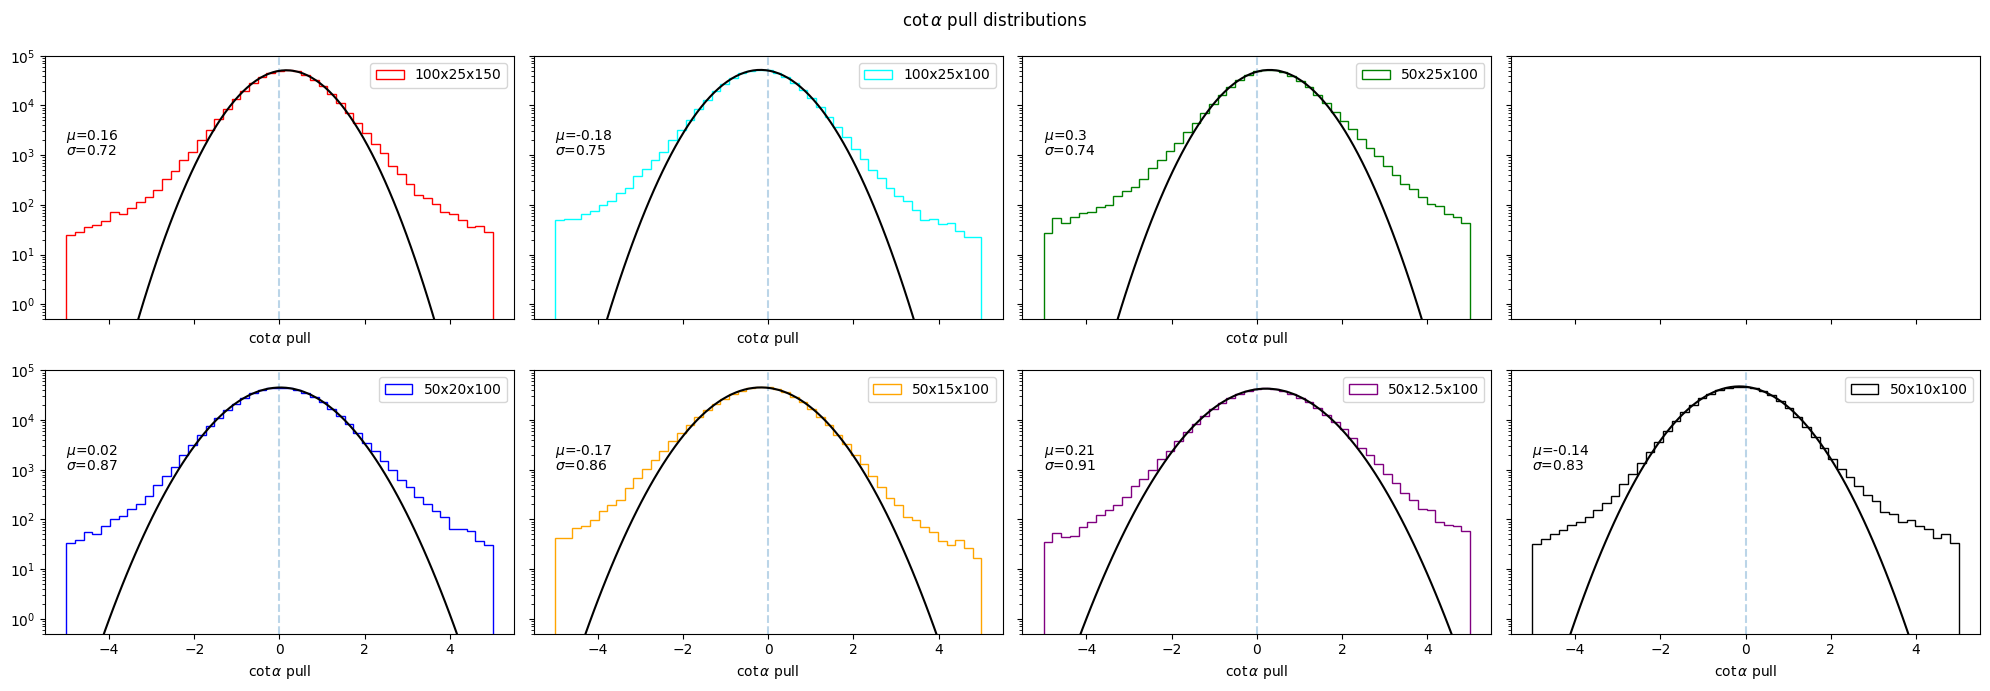

In [148]:
fig, axes = plt.subplots(2,4,sharex=True,sharey=True,figsize=(20,7))
pull_plot(axes[0][0], df_1['pullcotA'], label='100x25x150', name=r'$\cot\alpha$ pull', color='red')
pull_plot(axes[0][1], df_2['pullcotA'], label='100x25x100', name=r'$\cot\alpha$ pull', color='cyan')
pull_plot(axes[0][2], df_3['pullcotA'], label='50x25x100', name=r'$\cot\alpha$ pull', color='green')
pull_plot(axes[1][0], df_4['pullcotA'], label='50x20x100', name=r'$\cot\alpha$ pull', color='blue')
pull_plot(axes[1][1], df_5['pullcotA'], label='50x15x100', name=r'$\cot\alpha$ pull', color='orange')
pull_plot(axes[1][2], df_6['pullcotA'], label='50x12.5x100', name=r'$\cot\alpha$ pull', color='purple')
pull_plot(axes[1][3], df_7['pullcotA'], label='50x10x100', name=r'$\cot\alpha$ pull', color='black')

fig.suptitle(r'$\cot\alpha$ pull distributions')
fig.tight_layout()
fig.show()

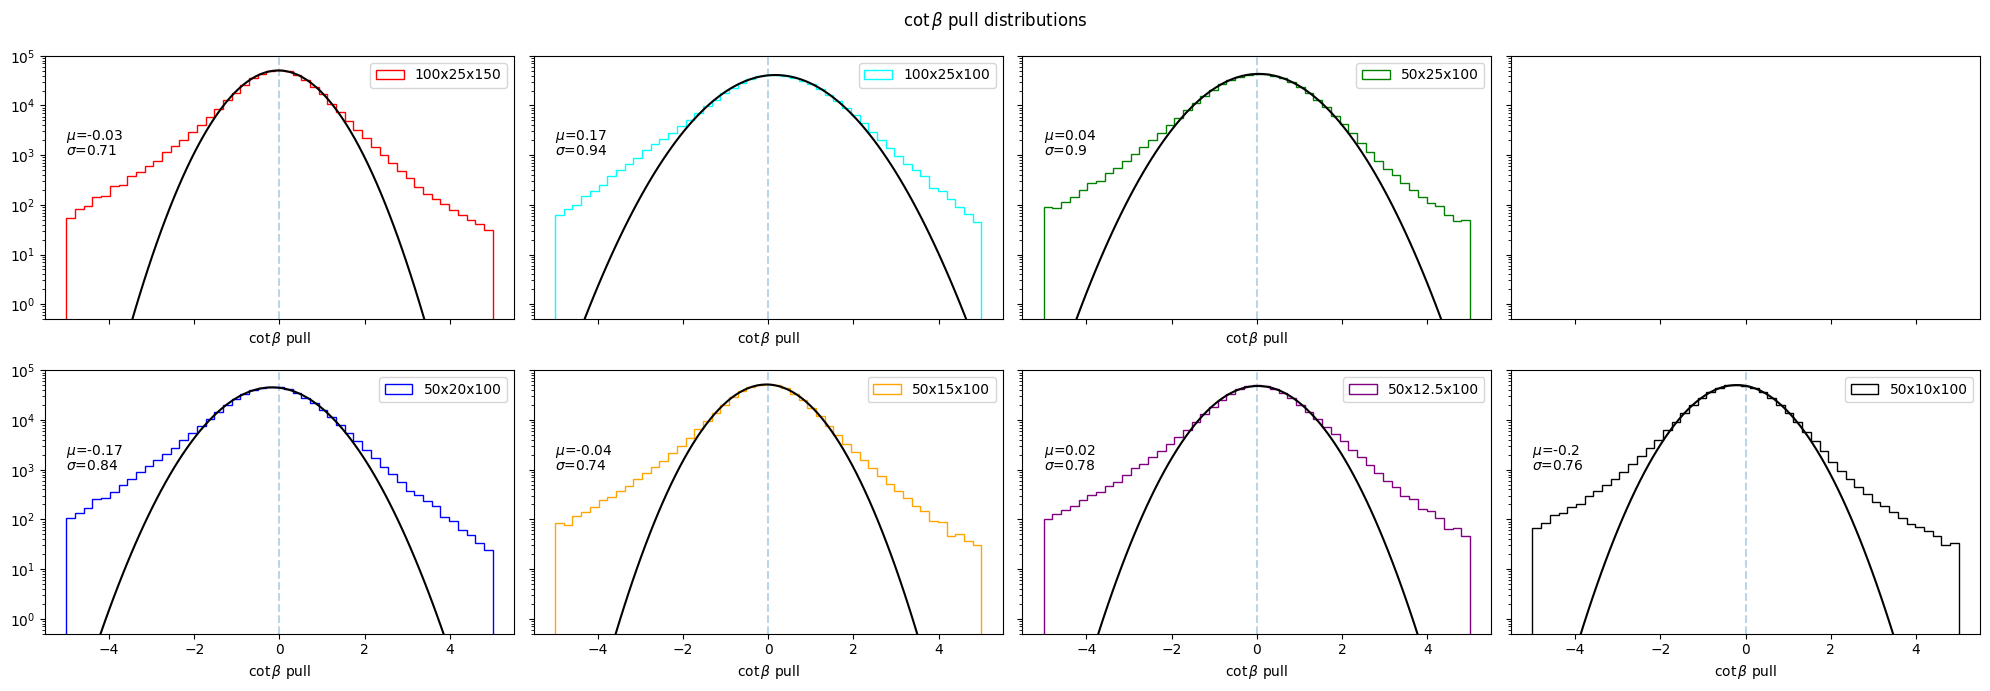

In [149]:
fig, axes = plt.subplots(2,4,sharex=True,sharey=True,figsize=(20,7))
pull_plot(axes[0][0], df_1['pullcotB'], label='100x25x150', name=r'$\cot\beta$ pull', color='red')
pull_plot(axes[0][1], df_2['pullcotB'], label='100x25x100', name=r'$\cot\beta$ pull', color='cyan')
pull_plot(axes[0][2], df_3['pullcotB'], label='50x25x100', name=r'$\cot\beta$ pull', color='green')
pull_plot(axes[1][0], df_4['pullcotB'], label='50x20x100', name=r'$\cot\beta$ pull', color='blue')
pull_plot(axes[1][1], df_5['pullcotB'], label='50x15x100', name=r'$\cot\beta$ pull', color='orange')
pull_plot(axes[1][2], df_6['pullcotB'], label='50x12.5x100', name=r'$\cot\beta$ pull', color='purple')
pull_plot(axes[1][3], df_7['pullcotB'], label='50x10x100', name=r'$\cot\beta$ pull', color='black')

fig.suptitle(r'$\cot\beta$ pull distributions')
fig.tight_layout()
fig.show()